# US Airlines Tweets

In [1]:
import pandas as pd
dataset = pd.read_csv('Tweets.csv')

## DATA SUMMARY - Importing and Viewing the Dataset

In [2]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
# pip install wordcloud
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

In [5]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
#import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\torhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\torhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\torhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
from sklearn.metrics import accuracy_score

### The shape of the dataset - 15 columns and 14,640 rows

In [7]:
dataset.shape

(14640, 15)

In [8]:
### No missing values for the two main columns for this analysis

In [9]:
nan_rows = dataset[dataset['airline_sentiment'].isnull()]

In [10]:
nan_rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


In [11]:
nan_rows = dataset[dataset['text'].isnull()]
nan_rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


In [12]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

dataset.head()  

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# View of the airlines and number of tweets for each of them

In [13]:
dataset.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0, 0.5, 'No. of Tweets')

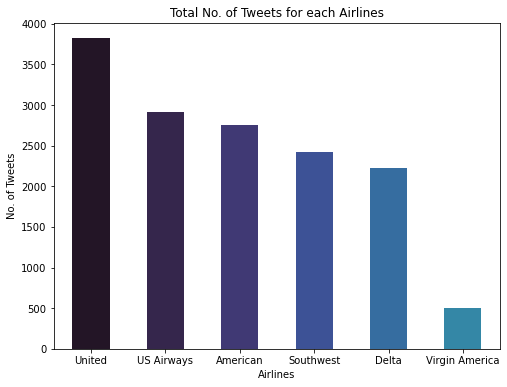

In [14]:
#Plotting the number of tweets each of the airlines has got. United Airlines has been mentioned the most.
colors=sns.color_palette("mako", 10) 
pd.Series(dataset["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [15]:
#The percentage of tweets that each airline accounts in this dataset
(dataset[['airline', 'text']].groupby('airline').count()/len(dataset)).sort_values(by='text', ascending=False)

,text
airline,
United,0.261066
US Airways,0.198975
American,0.188456
Southwest,0.165301
Delta,0.151776
Virgin America,0.034426


In [153]:
#counting the number of each type of sentiments.
# There are many more instances of negative tweets compared with neutral and positive
dataset.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0, 0.5, 'No. of Tweets')

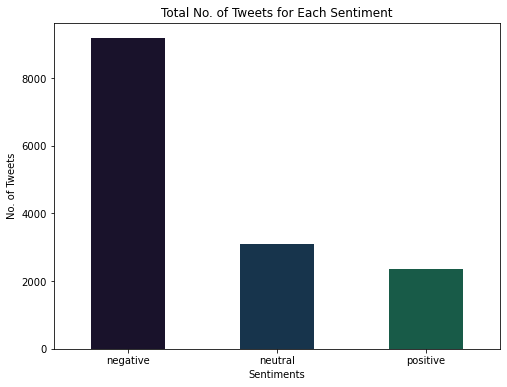

In [154]:
#Plotting the number of each type of sentiments - It is an imbalanced dataset
colors=sns.color_palette("cubehelix", 10)
pd.Series(dataset["airline_sentiment"]).value_counts().plot(kind = "bar",
                                    color=colors,figsize=(8,6),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

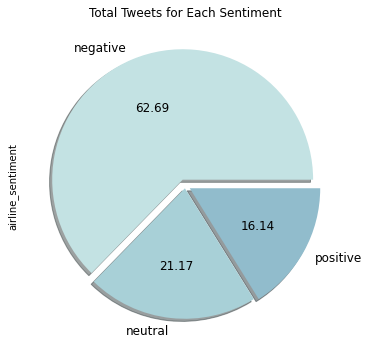

In [155]:
colors=sns.color_palette("ch:start=.2,rot=-.3", 10)
pd.Series(dataset["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

### Observation summary:
Of the total tweets, there are almost 63% which are negative, and combined the neutral and positive is only 37%. 
The analysis will first treat this as a multiclass prediction, but also a binary prediction.

## Remove unnescesary columns

In [16]:
# From the analysis of the data set, there are only two columns to use for modelling, 
# the target variable "Airline Sentiment" and the "text" feautre
data = dataset.loc[:, ['airline_sentiment', 'text']]

In [17]:
# The shape of the data frame is now having just two columns, but we still have the same number of observations
data.shape

(14640, 2)

## Pre-Processing the Data

In [18]:
# Remove the HTML tages
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Remove Contracttions. The installation of this library did not wok. The same process being done in a step below
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Remove numbers in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: strip_html(x))
# data['Text'] = data['Text'].apply(lambda x: replace_contractions(x))
data['text'] = data['text'].apply(lambda x: remove_numbers(x))

### Tokenize

In [19]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

### Define Stop words being taken out of the predefined list of stop words

In [20]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))  

In [21]:
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, 's, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big, bad, thing, about, it]"


### Functions for pre-processing the text feature

In [22]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica nt today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [23]:
# Store the preprocessed dataset
data.to_csv('Tweets_preproc.csv')

# Method : Bag of Words

In [24]:
## Bag of Words
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()  

In [25]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
data_features.shape

(14640, 1000)

In [27]:
# Defined 3 classes: 1 for negative sentiment, 2 for neutral and 3 for positive sentiment

In [28]:
def SentimentFlag(x):
    if x == 'negative':
        return 1
    elif x == 'neutral':
        return 2       
    else:
        return 3
data['ClassLabel'] = data['airline_sentiment'].apply(lambda x: SentimentFlag(x))

In [29]:
# View the encoding of sentiment classes
data.head(15)

,airline_sentiment,text,ClassLabel
0,neutral,virginamerica dhepburn say,2
1,positive,virginamerica plus add commercials experience tacky,3
2,neutral,virginamerica nt today must mean need take another trip,2
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,1
4,negative,virginamerica really big bad thing,1
5,negative,virginamerica seriously would pay flight seat nt play really bad thing fly va,1
6,positive,virginamerica yes nearly every time fly vx ear worm win go away,3
7,neutral,virginamerica really miss prime opportunity men without hat parody https tcomwpggrezp,2
8,positive,virginamerica well didntbut,3
9,positive,virginamerica amaze arrive hour early good,3


In [30]:
# Distribution of the sentiment classes. Imbalanced, with many more negative sentiments compared with the two other sentiments
data['ClassLabel'].value_counts()

1    9178
2    3099
3    2363
Name: ClassLabel, dtype: int64

# Word Cloud

In [233]:
wc_string = data['text'].str.cat(sep=' ')

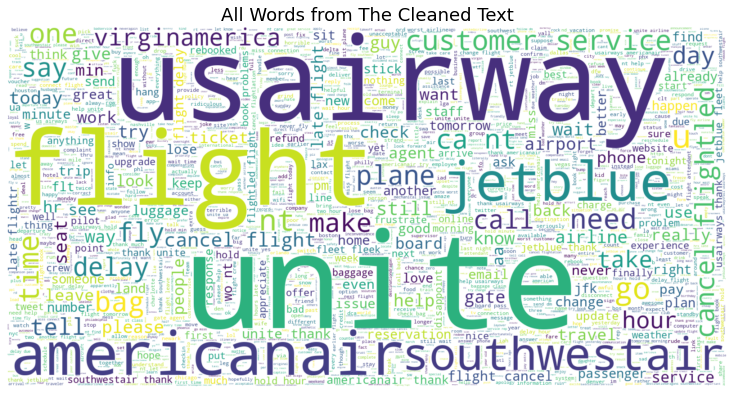

In [234]:
wc = WordCloud(width=1600, height=800,background_color="white", max_words=2000).generate(wc_string)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('All Words from The Cleaned Text', fontsize=18)
plt.show()

In [236]:
pos_string = data[data.ClassLabel == 3]['text'].str.cat(sep=' ')

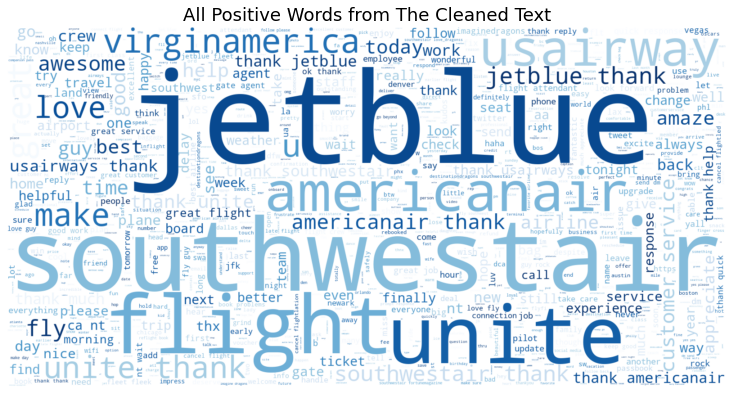

In [238]:
wc = WordCloud(width=1600, height=800,background_color="white", colormap="Blues", max_words=2000).generate(pos_string)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('All Positive Words from the Text', fontsize=18)
plt.show()

In [240]:
neg_string = data[data.ClassLabel == 1]['text'].str.cat(sep=' ')

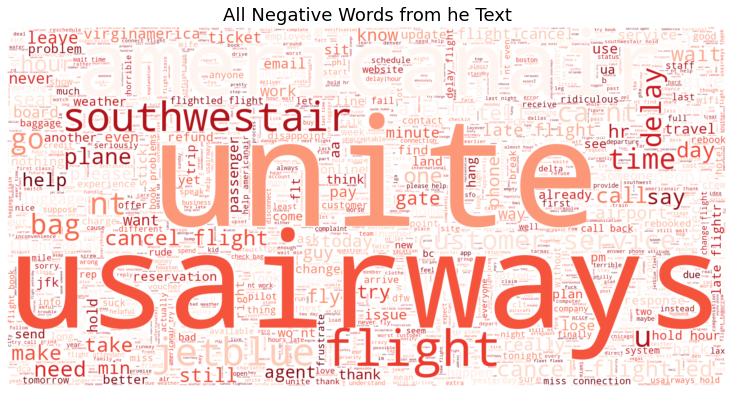

In [242]:
wc = WordCloud(width=1600, height=800,background_color="white", colormap="Reds", max_words=2000).generate(neg_string)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('All Negative Words from he Text', fontsize=18)
plt.show()

In [171]:
# Dropping the obselete data columns, which was replaced by the class label columns above and set the data type to integer

In [31]:
data.drop(columns=['airline_sentiment'],
         inplace=True)

In [33]:
# define format of the class label
labels = data['ClassLabel']
labels = labels.astype('int')

## Model Prediction with Bag of Words

In [34]:
# Defined features and class variable for my template
y_true = labels
dataset = data_features

In [35]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, y_true, test_size=0.3, random_state=42)

In [36]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (10248, 1000)
Number of data points in test data : (4392, 1000)


In [37]:
from collections import Counter

### Model for Prediction: Random Forest

In [38]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_model = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest_model = forest_model.fit(X_train, y_train)

print(forest_model)

print(np.mean(cross_val_score(forest_model, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7077185792349727


In [41]:
# Predict the result for test data using the model built above.

predictions = forest_model.predict(X_test)

### Confusion Matrix Function

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])

[[2465  259   90]
 [ 359  450   75]
 [ 180  108  406]]


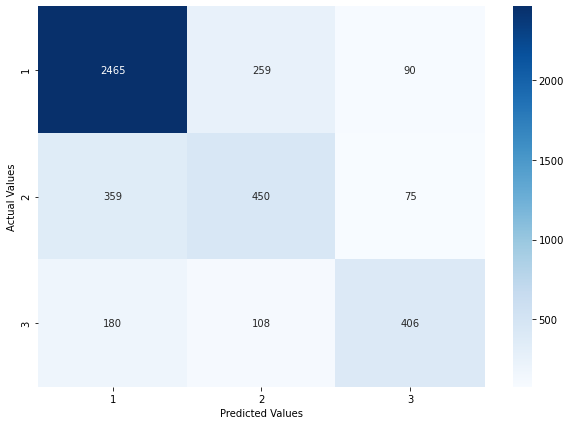

In [43]:
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Observations:
The confusion matrix shows several misclassified data points, especially the minority classes (in terms of percentage)
The Accuracy Score is 75,6 %

In [44]:
Score = accuracy_score(y_test, predictions)
print('Accuracy Score: ', Score)

Accuracy Score:  0.7561475409836066


In [45]:
from sklearn.metrics import classification_report
# Print the imbalanced classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.82      0.88      0.85      2814
           2       0.55      0.51      0.53       884
           3       0.71      0.59      0.64       694

    accuracy                           0.76      4392
   macro avg       0.69      0.66      0.67      4392
weighted avg       0.75      0.76      0.75      4392



### Observation:
The f1 score is high for class 1 (Negative), which is the majority class, where both precision and recall scores very high compared with the two other classes.. Class 2 has only 0.50 in recall, which is a concern for this model.

# Model Prediction with TF/IDF


In [70]:
# Store the preprocessed dataset
fields = ['airline_sentiment', 'text']
data = pd.read_csv('Tweets_preproc.csv', usecols=fields)

In [71]:
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica nt today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [58]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

In [59]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [60]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.714207650273224


In [61]:
predictions = forest.predict(X_test)

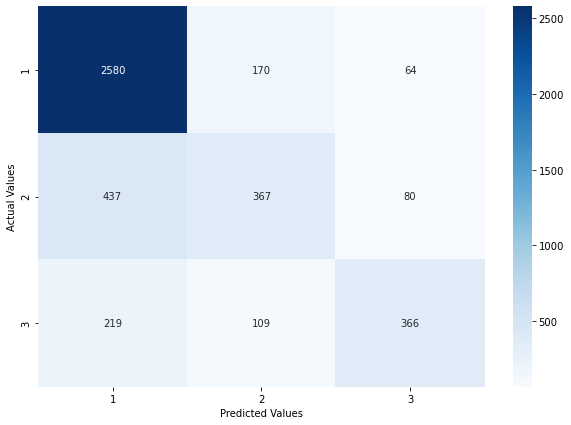

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [63]:
Score = accuracy_score(y_test, predictions)
print('Accuracy Score: ', Score)

Accuracy Score:  0.7543260473588342


In [64]:
from sklearn.metrics import classification_report
# Print the imbalanced classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.80      0.92      0.85      2814
           2       0.57      0.42      0.48       884
           3       0.72      0.53      0.61       694

    accuracy                           0.75      4392
   macro avg       0.69      0.62      0.65      4392
weighted avg       0.74      0.75      0.74      4392



### Observation:
The TF IDF vectorizer does not improve the accuracy score compared with the "Bag of Words" model, and the recall and precision for the class 2 and class 3 are even worse

## Improvement of the model

In [72]:
# Store the preprocessed dataset
fields = ['airline_sentiment', 'text']
data = pd.read_csv('Tweets_preproc.csv', usecols=fields)

In order to improve the model of the sentiments, the approach should be to treat this is a binary problem , rather than a multiclass problem. 

In [73]:
## Bag of Words
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()  

In [74]:
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica nt today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [75]:
# Create two classes: Negative and Positive (Neutral and Positive)
data['ClassLabel'] = data['airline_sentiment'].apply(lambda x: 1 if x=='negative' else 0)

In [76]:
data.head()

,airline_sentiment,text,ClassLabel
0,neutral,virginamerica dhepburn say,0
1,positive,virginamerica plus add commercials experience tacky,0
2,neutral,virginamerica nt today must mean need take another trip,0
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,1
4,negative,virginamerica really big bad thing,1


In [77]:
# Distribution of the sentiment classes. Still Imbalanced, with many more negative sentiments compared 
# with the positive sentiment, however less imbalanced compared to the multiclass modelling above.
data['ClassLabel'].value_counts()

1    9178
0    5462
Name: ClassLabel, dtype: int64

In [78]:
data.drop(columns=['airline_sentiment'],
         inplace=True)

labels = data['ClassLabel']
labels = labels.astype('int')


In [79]:
# Defined features and class variable for my template
y_true = labels
dataset = data_features

In [80]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)



In [81]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (10248, 1000)
Number of data points in test data : (4392, 1000)


In [82]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7517076502732242


In [83]:
predictions = forest.predict(X_test)

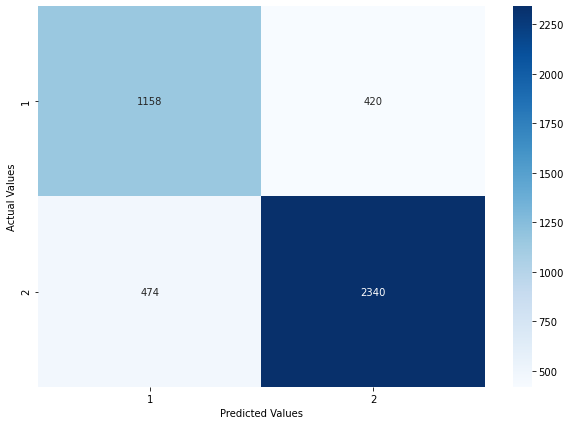

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12"],
                  columns = [i for i in "12"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()



In [85]:
Score = accuracy_score(y_test, predictions)
print('Accuracy Score: ', Score)

Accuracy Score:  0.796448087431694


In [86]:
from sklearn.metrics import classification_report
# Print the imbalanced classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1578
           1       0.85      0.83      0.84      2814

    accuracy                           0.80      4392
   macro avg       0.78      0.78      0.78      4392
weighted avg       0.80      0.80      0.80      4392



### Observation:
Combining the neutral and positive sentiment, improved the accuracy, as well as precision and recall considerably.
With hyper parameter tuning of the Random Forest model, the scores should improve even more

## Hyper parameter Tuning - RandomizedSearchCV

In [87]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
#n_estimators = [int(x) for x in range(200,2000,200)]
n_estimators = [100,150]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 11)]

max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
bootstrap = [False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 150], 'max_features': ['auto'], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [False]}


In [88]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   39.7s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.7s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20,
                                                      None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150]},
                   random_state=42, verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [90]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

0.8217213114754098
[[1083  495]
 [ 288 2526]]


In [91]:
predictions = rf_random.predict(X_test)

In [92]:
Score = accuracy_score(y_test, predictions)
print('Accuracy Score: ', Score)

Accuracy Score:  0.8217213114754098


In [93]:
from sklearn.metrics import classification_report
# Print the imbalanced classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73      1578
           1       0.84      0.90      0.87      2814

    accuracy                           0.82      4392
   macro avg       0.81      0.79      0.80      4392
weighted avg       0.82      0.82      0.82      4392



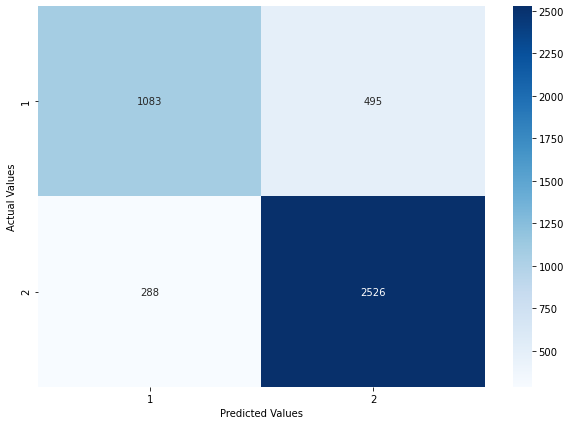

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12"],
                  columns = [i for i in "12"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Observation: 
Hyper parameter tuning the model improved Accuracy and F1 score. Due to capacity constraints, the tuning was limited

# Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization and performance of the model on the dataset.

The approach for this project was to identify which columns to use for the analysis. There were one target variable and one feature variable containing the text.

The target variable had 3 classes, with different number of instances between classes. Negative tweets has the majority of the sentitments. 

Uneseccary columns were removed and the class labels were transformed to numeric values and the text feture was processed to enable text modelling.

Preprocessing steps inlcluded removal og HTML tags and numbers in the text.
Then tokenize the text feature to split the entire text into small units, called tokens.
Once these steps were done, the stopwords were defined.

Next part of the preprocssing was to remove ascii symbols, transform text to lower case, remove punctation, remove stopwords.
Then do lemmatization of the text, which is a morphological analysis of the words, enabling contextual formation of words.

Then the Bag of Words model is applied, were the occurence of each words is used as a feature for training the classifier.
The accuracy using this model with Random Forest was 75,6%. The precision and recall was low for the minority classes 'neutral' and 'positiv', but hight for the majority class 'negative'.

The other text model TF/IDF, which is intended to reflect how important a word is to a corpus. Applying Random Forest to this model gave lower accuracy, 71,4% with low recall and precision for the minority classes.

To improve the model, the minority classes were combined. With just two classes, the accuracy and the precision and recall improved using Bag of Words. With a tuned Random Forest model, the accuracy was reported at 82%.


